# Python notebook for INF2178 Midterm

In [ ]:
# importing required libraries
from scipy import stats
from scipy.stats import f_oneway, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels
import math
import random
import statistics
import scipy.stats as sp
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [ ]:
# importing data via github 
file = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
arrest_and_strip_search = pd.read_csv(file)
arrest_and_strip_search.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# checking for the null values
arrest_and_strip_search.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
# treating null and inconsistent values
arrest_and_strip_search['Perceived_Race'].fillna('996', inplace = True)
arrest_and_strip_search['ArrestLocDiv'] = arrest_and_strip_search['ArrestLocDiv'].replace(['XX'], '996')
arrest_and_strip_search.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,996,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,996,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


Analyzing data to gather information using catplots to discovers insights and trends for further analysis

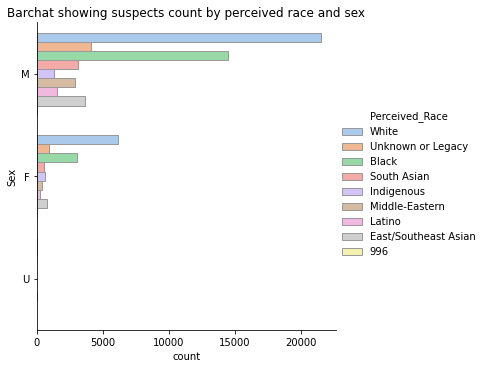

In [ ]:
# catplot for gender distribution for perceived race
fig1 = sns.catplot(y="Sex", hue="Perceived_Race", kind="count",
            palette="pastel", edgecolor=".6",
            data=arrest_and_strip_search).set(title='Barchat showing suspects count by perceived race and sex')

Text(0.5, 1.3, 'Barchat showing suspects count by perceived race and occurrence category')

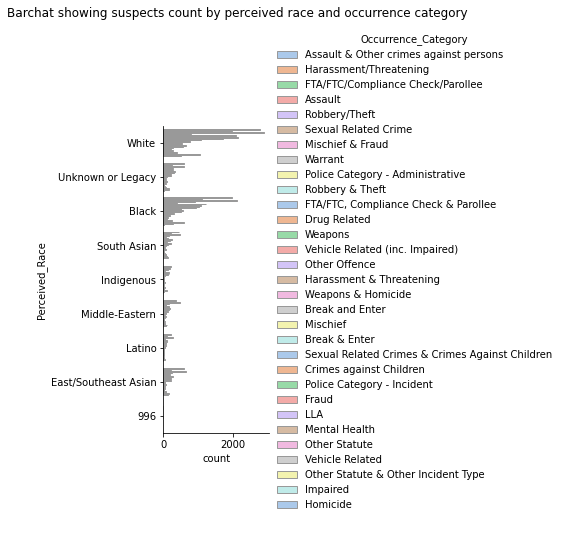

In [ ]:
# catplot for crime commited by perceived race
fig2 = sns.catplot(y="Perceived_Race", hue="Occurrence_Category", kind="count",
            palette="pastel", edgecolor=".6",data=arrest_and_strip_search)
fig2.fig.suptitle("Barchat showing suspects count by perceived race and occurrence category",
                  y='1.3')

Text(0.5, 1.3, 'Barchat showing white suspects count by occurrence_category and sex')

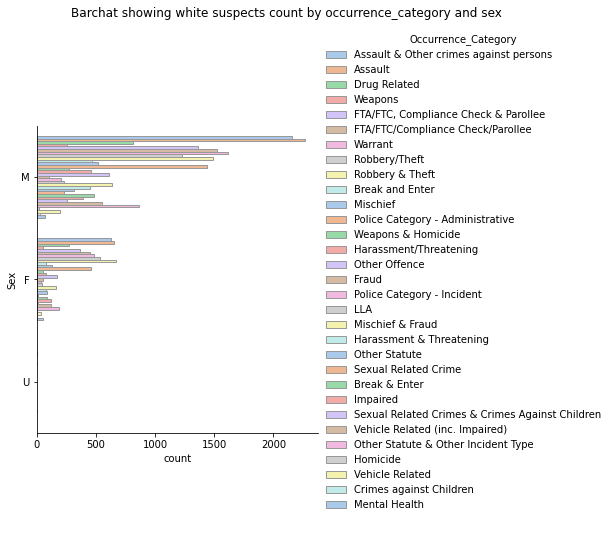

In [ ]:
# catplot for gender distribution for crime commited by perceived race = white
temp_df1 = arrest_and_strip_search[arrest_and_strip_search.Perceived_Race == 'White']

fig3 = sns.catplot(y="Sex", hue="Occurrence_Category", kind="count",
            palette="pastel", edgecolor=".6",
            data=temp_df1)

fig3.fig.suptitle("Barchat showing white suspects count by occurrence_category and sex",
               y='1.3')

Text(0.5, 1.3, 'Barchat showing black suspects count by occurrence_category and sex')

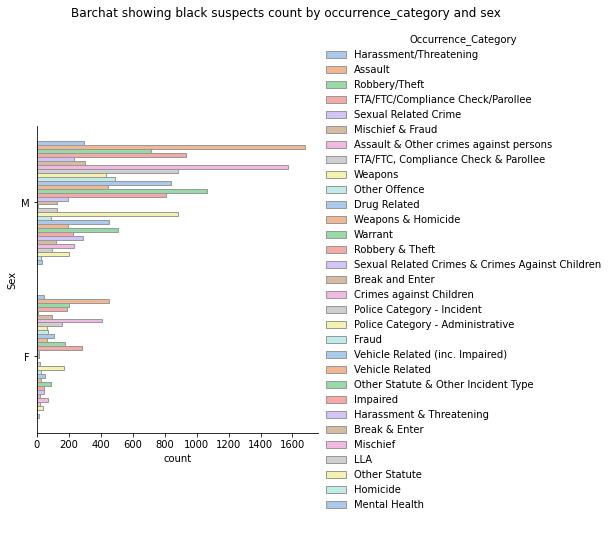

In [ ]:
# catplot for gender distribution for crime commited by perceived race = black
temp_df2 = arrest_and_strip_search[arrest_and_strip_search.Perceived_Race == 'Black']

fig4 = sns.catplot(y="Sex", hue="Occurrence_Category", kind="count",
            palette="pastel", edgecolor=".6",
            data=temp_df2)

fig4.fig.suptitle("Barchat showing black suspects count by occurrence_category and sex",
               y='1.3')

From the catplots above, we can see that number of assualts committed is high.

Performing further analysis for crime type = assault

Text(0.5, 1.1, 'barchat showing perceived race distribution for crime type as assault')

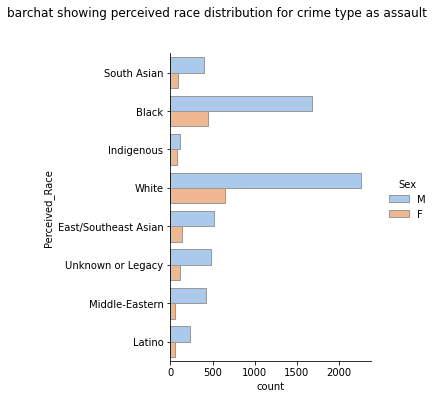

In [ ]:
# catplot for perceived race distribution for crime type = assault
temp_df3 = arrest_and_strip_search[arrest_and_strip_search.Occurrence_Category == 'Assault']

fig5 = sns.catplot(y="Perceived_Race", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=temp_df3)
fig5.fig.suptitle("barchat showing perceived race distribution for crime type as assault",
               y='1.1')

In [ ]:
# performing one-hot encoding for perceived race for improved analysis
data_set_corr = arrest_and_strip_search.copy()
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['White'], '1')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['Unknown or Legacy'], '2')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['Black'], '3')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['South Asian'], '4')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['Indigenous'], '5')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['Middle-Eastern'], '6')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['Latino'], '7')
data_set_corr['Perceived_Race'] = data_set_corr['Perceived_Race'].replace(['East/Southeast Asian'], '8')
data_set_corr.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,1,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,1,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,2,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,3,M,Aged 25 to 34 years,Not a youth,996,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,4,M,Aged 25 to 34 years,Not a youth,996,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# performing one-hot encoding for age group at attrest for improved analysis
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 17 years and under'], '1')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 17 years and younger'], '2')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 18 to 24 years'], '3')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 25 to 34 years'], '4')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 35 to 44 years'], '5')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 45 to 54 years'], '6')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 55 to 64 years'], '7')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 65 and older'], '8')
data_set_corr['Age_group__at_arrest_'] = data_set_corr['Age_group__at_arrest_'].replace(['Aged 65 years and older'], '9')
data_set_corr['Age_group__at_arrest_'].fillna('996', inplace = True)
data_set_corr.Age_group__at_arrest_ = data_set_corr.Age_group__at_arrest_.astype('int64')
data_set_corr.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,1,M,5,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,1,M,5,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,2,M,5,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,3,M,4,Not a youth,996,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,4,M,4,Not a youth,996,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


Analyzing if there were high number of arrest based on location

In [ ]:
# converting datatype for ArrestLocDiv and Perceived_Race from object to int64
data_set_corr.ArrestLocDiv = data_set_corr.ArrestLocDiv.astype('int64')
data_set_corr.Perceived_Race = data_set_corr.Perceived_Race.astype('int64')

In [ ]:
# checking correlation for race and location
correlation_loc = data_set_corr['Perceived_Race'].corr(data_set_corr['ArrestLocDiv'])
print(correlation_loc)

0.0034894775079046076


Analyzing if age and race had any correlation

In [ ]:
# checking correlation for race and age
correlation_age = data_set_corr['Perceived_Race'].corr(data_set_corr['Age_group__at_arrest_'])
print(correlation_age)

-0.0015099670714357198


As the correlation is quite weak for both the tests, expanding the scope of the analysis

Filtering data into subsets using column year for datapoints

In [ ]:
# splitting data into 2 subsets
arrest_2020 = arrest_and_strip_search[arrest_and_strip_search.Arrest_Year == 2020]
arrest_2021 = arrest_and_strip_search[arrest_and_strip_search.Arrest_Year == 2021]

Text(0.5, 1.1, 'Barchart showing distribution of book count in terms of perceived race with any types of crime in 2020')

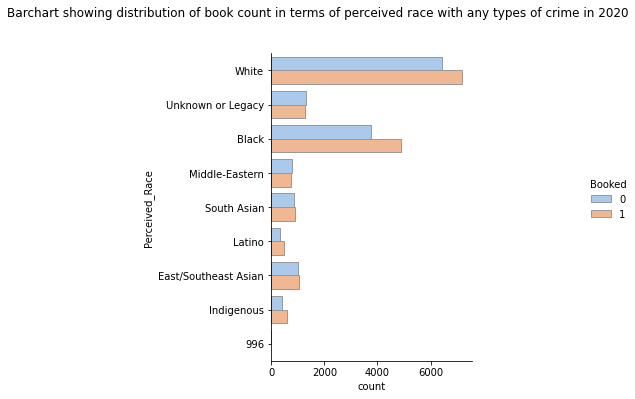

In [ ]:
# catplot for distribution of race based on the whether booked for crime for year = 2020
fig6 = sns.catplot(y="Perceived_Race", hue="Booked", kind="count",
            palette="pastel", edgecolor=".6",
            data=arrest_2020)
fig6.fig.suptitle("Barchart showing distribution of book count in terms of perceived race with any types of crime in 2020",
               y='1.1')

Text(0.5, 1.1, 'Barchart showing distribution of book count in terms of perceived race with any types of crime in 2021')

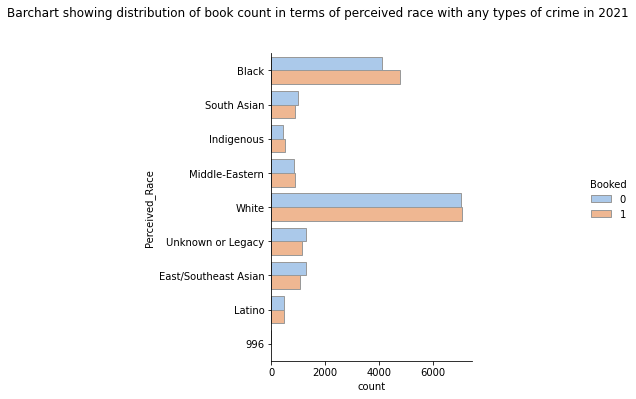

In [ ]:
# catplot for distribution of race based on the whether booked for crime for year = 2021
fig7 = sns.catplot(y="Perceived_Race", hue="Booked", kind="count",
            palette="pastel", edgecolor=".6",
            data=arrest_2021)
fig7.fig.suptitle("Barchart showing distribution of book count in terms of perceived race with any types of crime in 2021",
               y='1.1')

Diving deep and creating subsets for year

In [ ]:
# creating subsets for Sex for the year = 2020
subset_2020_df_M_B01 = arrest_2020[arrest_2020['Sex'] == 'M']
subset_2020_df_F_B01 = arrest_2020[arrest_2020['Sex'] == 'F']

# creating further subsets for datapoints where value for booked = 1 for the year = 2020
subset_2020_df_M = subset_2020_df_M_B01[subset_2020_df_M_B01['Booked'] == 1]
subset_2020_df_F = subset_2020_df_F_B01[subset_2020_df_F_B01['Booked'] == 1]

In [ ]:
# calculating number of datapoints where value for booked = 1 for the year 2020
arrest_2020_grouped_data_M = pd.DataFrame({'booked_count': subset_2020_df_M.groupby('Perceived_Race')['Booked'].count()}).reset_index()
arrest_2020_grouped_data_F = pd.DataFrame({'booked_count': subset_2020_df_F.groupby('Perceived_Race')['Booked'].count()}).reset_index()
arrest_2020_grouped_data_M.head(32)

,Perceived_Race,booked_count
0,Black,4206
1,East/Southeast Asian,917
2,Indigenous,419
3,Latino,421
4,Middle-Eastern,682
5,South Asian,803
6,Unknown or Legacy,1080
7,White,5772


In [ ]:
arrest_2020_grouped_data_F.head(32)

,Perceived_Race,booked_count
0,Black,679
1,East/Southeast Asian,120
2,Indigenous,164
3,Latino,55
4,Middle-Eastern,59
5,South Asian,98
6,Unknown or Legacy,207
7,White,1413


In [ ]:
# creating subsets for Sex for the year = 2021
subset_2021_df_M_B01 = arrest_2021[arrest_2021['Sex'] == 'M']
subset_2021_df_F_B01 = arrest_2021[arrest_2021['Sex'] == 'F']

# creating further subsets for datapoints where value for booked = 1 for the year = 2021
subset_2021_df_M = subset_2021_df_M_B01[subset_2021_df_M_B01['Booked'] == 1]
subset_2021_df_F = subset_2021_df_F_B01[subset_2021_df_F_B01['Booked'] == 1]

In [ ]:
# calculating number of datapoints where value for booked = 1 for the year 2021
arrest_2021_grouped_data_M = pd.DataFrame({'booked_count': subset_2021_df_M.groupby('Perceived_Race')['Booked'].count()}).reset_index()
arrest_2021_grouped_data_F = pd.DataFrame({'booked_count': subset_2021_df_F.groupby('Perceived_Race')['Booked'].count()}).reset_index()
arrest_2021_grouped_data_F.head(32)

,Perceived_Race,booked_count
0,Black,667
1,East/Southeast Asian,110
2,Indigenous,154
3,Latino,60
4,Middle-Eastern,64
5,South Asian,91
6,Unknown or Legacy,163
7,White,1388


In [ ]:
arrest_2021_grouped_data_M.head(32)

,Perceived_Race,booked_count
0,Black,4120
1,East/Southeast Asian,947
2,Indigenous,337
3,Latino,429
4,Middle-Eastern,827
5,South Asian,785
6,Unknown or Legacy,986
7,White,5686


Generating descriptive statistics for the dataset based on number of arrests

In [ ]:
# descriptive statistics for the grouped data
arrest_2020_grouped_data_M.describe()

,booked_count
count,8.000000
mean,1787.500000
std,2032.422692
min,419.000000
25%,616.750000
50%,860.000000
75%,1861.500000
max,5772.000000


In [ ]:
arrest_2020_grouped_data_F.describe()

,booked_count
count,8.000000
mean,349.375000
std,475.298684
min,55.000000
25%,88.250000
50%,142.000000
75%,325.000000
max,1413.000000


In [ ]:
arrest_2021_grouped_data_M.describe()

,booked_count
count,8.000000
mean,1764.625000
std,1995.013565
min,337.000000
25%,696.000000
50%,887.000000
75%,1769.500000
max,5686.000000


In [ ]:
arrest_2021_grouped_data_F.describe()

,booked_count
count,8.0000
mean,337.1250
std,469.1282
min,60.0000
25%,84.2500
50%,132.0000
75%,289.0000
max,1388.0000


In [ ]:
# appending subsets to create one large dataset for further analysis
df1= arrest_2020_grouped_data_M
df1["Year"] = 2020
df1["Sex"] = 'M'

df2= arrest_2020_grouped_data_F
df2["Year"] = 2020
df2["Sex"] = 'F'

df3= arrest_2021_grouped_data_M
df3["Year"] = 2021
df3["Sex"] = 'M'

df4= arrest_2021_grouped_data_F
df4["Year"] = 2021
df4["Sex"] = 'F'

df_2020 = df1.append(df2, ignore_index = True)
df_2021 = df3.append(df4, ignore_index = True)

data_frame = df_2020.append(df_2021, ignore_index = True)
data_frame.head(5)

,Perceived_Race,booked_count,Year,Sex
0,Black,4206,2020,M
1,East/Southeast Asian,917,2020,M
2,Indigenous,419,2020,M
3,Latino,421,2020,M
4,Middle-Eastern,682,2020,M


Performing EDA on booked count dataset

Text(0.5, 1.1, 'boxplot showing distribution for number of suspect booked categorized by race and year')

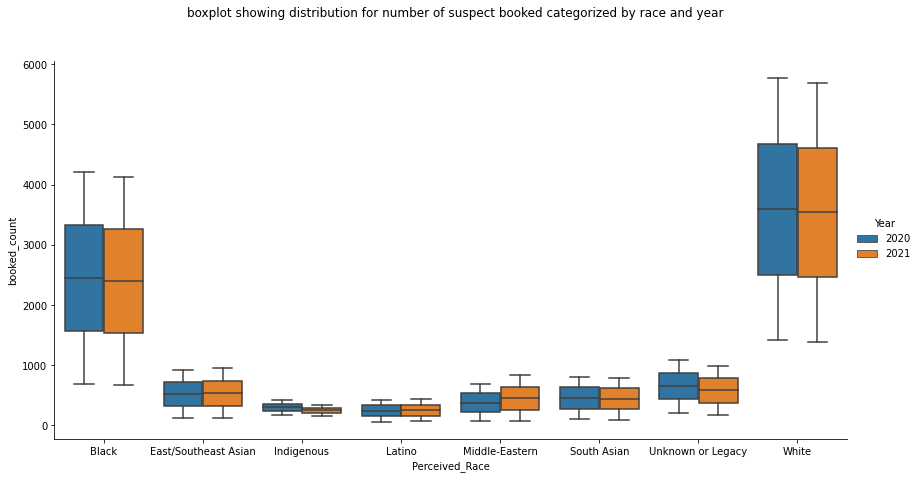

In [ ]:
# creating box plot to see data distribution for number of people booked based on year
fig8 = sns.catplot(data=data_frame, kind="box", x="Perceived_Race", y="booked_count", hue="Year", aspect=2, height=6)
fig8.fig.suptitle("boxplot showing distribution for number of suspect booked categorized by race and year",
               y='1.1')

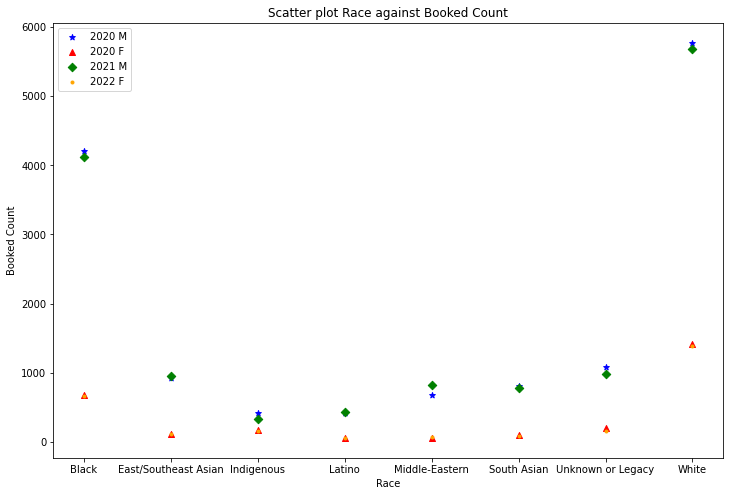

In [ ]:
# creating scatterplot for number of people booked by subsetting data based on year and sex for race
data_frame_2020 = data_frame[data_frame['Year'] == 2020]
data_frame_2021 = data_frame[data_frame['Year'] == 2021]

data_frame_M_2020 = data_frame_2020[data_frame_2020['Sex'] == 'M']
data_frame_F_2020 = data_frame_2020[data_frame_2020['Sex'] == 'F']
data_frame_M_2021 = data_frame_2021[data_frame_2021['Sex'] == 'M']
data_frame_F_2021 = data_frame_2021[data_frame_2021['Sex'] == 'F']

plt.figure(figsize=(12,8))
plt.scatter(data_frame_M_2020['Perceived_Race'], data_frame_M_2020['booked_count'], color='blue', label='2020 M', marker="*")
plt.scatter(data_frame_F_2020['Perceived_Race'], data_frame_F_2020['booked_count'], color='red', label='2020 F', marker="^")
plt.scatter(data_frame_M_2021['Perceived_Race'], data_frame_M_2021['booked_count'], color='green', label='2021 M', marker="D")
plt.scatter(data_frame_F_2021['Perceived_Race'], data_frame_F_2021['booked_count'], color='orange', label='2022 F', marker=".")
plt.xlabel("Race")
plt.ylabel("Booked Count")
plt.title("Scatter plot Race against Booked Count")
plt.legend()
plt.show()

Creating another dataframe where the individual who were being booked were cooperative or not during arrest

In [ ]:
# creating subsets with mean value for action at arrest as cooperative
arrest_coop_2020_grouped_data_M = pd.DataFrame({'coop_mean': subset_2020_df_M.groupby('Perceived_Race')['Actions_at_arrest___Cooperative'].mean()}).reset_index()
arrest_coop_2020_grouped_data_F = pd.DataFrame({'coop_mean': subset_2020_df_F.groupby('Perceived_Race')['Actions_at_arrest___Cooperative'].mean()}).reset_index()
arrest_coop_2021_grouped_data_M = pd.DataFrame({'coop_mean': subset_2021_df_M.groupby('Perceived_Race')['Actions_at_arrest___Cooperative'].mean()}).reset_index()
arrest_coop_2021_grouped_data_F = pd.DataFrame({'coop_mean': subset_2021_df_F.groupby('Perceived_Race')['Actions_at_arrest___Cooperative'].mean()}).reset_index()

In [ ]:
# appending subsets to create one large dataset for further analysis
df5= arrest_coop_2020_grouped_data_M
df5["Year"] = 2020
df5["Sex"] = 'M'

df6= arrest_coop_2020_grouped_data_F
df6["Year"] = 2020
df6["Sex"] = 'F'

df7= arrest_coop_2021_grouped_data_M
df7["Year"] = 2021
df7["Sex"] = 'M'

df8= arrest_coop_2021_grouped_data_F
df8["Year"] = 2021
df8["Sex"] = 'F'

df_coop_2020 = df5.append(df6, ignore_index = True)
df_coop_2021 = df7.append(df8, ignore_index = True)

data_frame_coop = df_coop_2020.append(df_coop_2021, ignore_index = True)
data_frame_coop.head(35)

,Perceived_Race,coop_mean,Year,Sex
0,Black,0.487399,2020,M
1,East/Southeast Asian,0.584515,2020,M
2,Indigenous,0.336516,2020,M
3,Latino,0.562945,2020,M
4,Middle-Eastern,0.516129,2020,M
5,South Asian,0.514321,2020,M
6,Unknown or Legacy,0.498148,2020,M
7,White,0.486140,2020,M
8,Black,0.424153,2020,F
9,East/Southeast Asian,0.625000,2020,F


Performing EDA on cooperative during arrest dataset

Text(0.5, 1.1, 'boxplot showing distribution for mean of suspects being cooperative during arrest based on year')

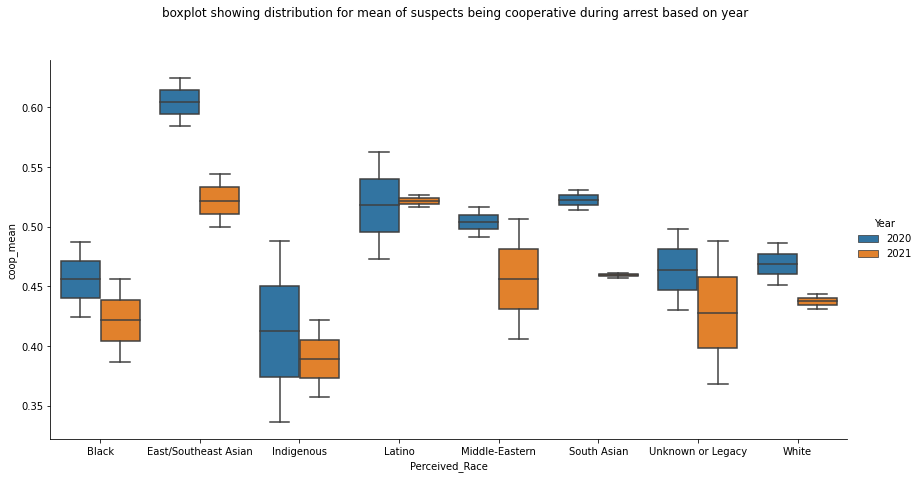

In [ ]:
# creating box plot to see data distribution for mean of people being cooperative during arrest based on year
fig9 = sns.catplot(data=data_frame_coop, kind="box", x="Perceived_Race", y="coop_mean", hue="Year", aspect=2, height=6)
fig9.fig.suptitle("boxplot showing distribution for mean of suspects being cooperative during arrest based on year",
               y='1.1')

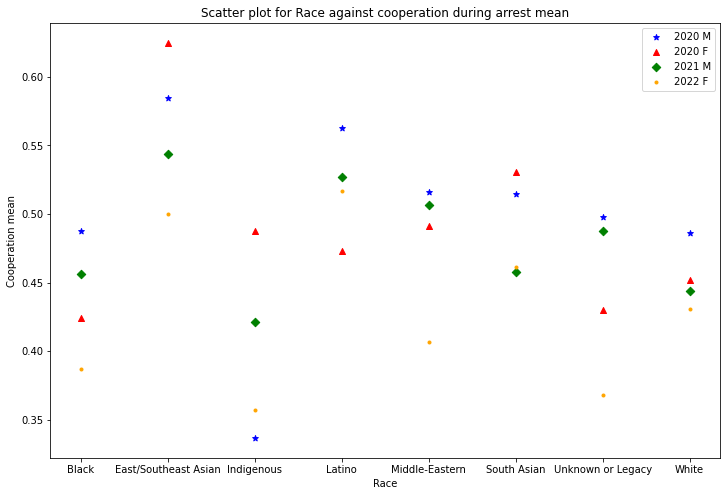

In [ ]:
# creating scatterplot for mean of people being cooperative during arrest by subsetting data based on year and sex for race
data_frame_coop_2020 = data_frame_coop[data_frame_coop['Year'] == 2020]
data_frame_coop_2021 = data_frame_coop[data_frame_coop['Year'] == 2021]

data_frame_coop_M_2020 = data_frame_coop_2020[data_frame_coop_2020['Sex'] == 'M']
data_frame_coop_F_2020 = data_frame_coop_2020[data_frame_coop_2020['Sex'] == 'F']
data_frame_coop_M_2021 = data_frame_coop_2021[data_frame_coop_2021['Sex'] == 'M']
data_frame_coop_F_2021 = data_frame_coop_2021[data_frame_coop_2021['Sex'] == 'F']

plt.figure(figsize=(12,8))
plt.scatter(data_frame_coop_M_2020['Perceived_Race'], data_frame_coop_M_2020['coop_mean'], color='blue', label='2020 M', marker="*")
plt.scatter(data_frame_coop_F_2020['Perceived_Race'], data_frame_coop_F_2020['coop_mean'], color='red', label='2020 F', marker="^")
plt.scatter(data_frame_coop_M_2021['Perceived_Race'], data_frame_coop_M_2021['coop_mean'], color='green', label='2021 M', marker="D")
plt.scatter(data_frame_coop_F_2021['Perceived_Race'], data_frame_coop_F_2021['coop_mean'], color='orange', label='2022 F', marker=".")
plt.xlabel("Race")
plt.ylabel("Cooperation mean")
plt.title("Scatter plot for Race against cooperation during arrest mean")
plt.legend(loc='upper right')
plt.show()

From the above obtained visualization of the data for both the sub-datasets, below are the research questions that we would like to test

**Research Question 1**: Did the year of covid-19 outbreak have an effect on the number of people booked for any offense and did the perceived race have any effect on it?

**Research Question 2**:
Did year of covid-19 outbreak have an effect on individual's co-operation level while being arrested and did the perceived race have any effect on it?

Checking if the data is normally distributed using **Shapiro-Wilk test**

**H0**: The sample is normally distributed

**H1**: The sample is not normally distributed

In [ ]:
# performing Shapiro-Wilk test
print('Normality distribution for dataframe capturing number of people booked: ', shapiro(data_frame["booked_count"]))
print('Normality distribution for dataframe capturing mean co-operation level of people while being arrested: ', shapiro(data_frame_coop["coop_mean"]))

Normality distribution for dataframe capturing number of people booked:  ShapiroResult(statistic=0.6263035535812378, pvalue=8.13130967003417e-08)
Normality distribution for dataframe capturing mean co-operation level of people while being arrested:  ShapiroResult(statistic=0.9882473349571228, pvalue=0.9740480780601501)


From the results obatined, we can observe that for test 1, which is distribution of data for number of people booked, is not normally distributed. 

However, for test 2, which is distribution of data for mean co-operation level of people being arrested comes from normal distribution. 

Therefore, the limitation for research question 1 is that the data being utilised is not normally distributed.

Performing t-test for RQ1

In [ ]:
# function to calculate welch dof
def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

**RQ1: Hypothesis for t-test**

**H0:** The population mean of the two independent groups, number of people booked in the year 2020 and number of people booked in the year 2021, are equal.

**H1:** The population mean of the two independent groups, number of people booked in the year 2020 and number of people booked in the year 2021, are different.

In [ ]:
# performing t-test
arrests_2020 = data_frame[data_frame['Year'] == 2020]
arrests_2021 = data_frame[data_frame['Year'] == 2021]

arrests_count_2020 = arrests_2020['booked_count']
arrests_count_2021 = arrests_2021['booked_count']

# performing a two-sample t.test
print('Ttest results for booked count in year 2020 and 2021: ', stats.ttest_ind(arrests_count_2020, arrests_count_2021, equal_var=True))

Ttest results for booked count in year 2020 and 2021:  Ttest_indResult(statistic=0.03114357464015838, pvalue=0.9753613147675115)


In [ ]:
# calculating mean number of arrests and its standard deviation
print('Mean arrests for year 2020 and 2021: ', arrests_count_2020.mean(), arrests_count_2021.mean())
print('Standard deviation for year 2020 and 2021: ', arrests_count_2020.std(), arrests_count_2021.std())

Mean arrests for year 2020 and 2021:  1068.4375 1050.875
Standard deviation for year 2020 and 2021:  1607.6767904339479 1582.237819250528


In [ ]:
# checking the confidence interval
cm = sms.CompareMeans(sms.DescrStatsW(arrests_count_2020), sms.DescrStatsW(arrests_count_2021))
print('Confidence interval for year 2020 and 2021: ', cm.tconfint_diff(usevar='unequal'))

Confidence interval for year 2020 and 2021:  (-1134.1290768279753, 1169.2540768279753)


In [ ]:
# welch dof 
print('DOF for year 2020 and 2021: ', welch_dof(arrests_count_2020, arrests_count_2021))

DOF for year 2020 and 2021:  29.992371194777398


Performing one-way ANOVA

**RQ1: Hypothesis for one-way ANOVA**

**H0**: The mean number of people booked for any offense for all 8 race groups is equal

**H1**: At least one mean group is different from the others for any of the race combination for the number of people booked for any offense

In [ ]:
# count vs race 
white = data_frame[data_frame["Perceived_Race"] == "White"]["booked_count"]
black = data_frame[data_frame["Perceived_Race"] == "Black"]["booked_count"]
east_southeast_asian = data_frame[data_frame["Perceived_Race"] == "East/Southeast Asian"]["booked_count"]
indigenous = data_frame[data_frame["Perceived_Race"] == "Indigenous"]["booked_count"]
latino = data_frame[data_frame["Perceived_Race"] == "Latino"]["booked_count"]
middle_eastern = data_frame[data_frame["Perceived_Race"] == "Middle-Eastern"]["booked_count"]
south_asian = data_frame[data_frame["Perceived_Race"] == "South Asian"]["booked_count"]
unknown_or_legacy = data_frame[data_frame["Perceived_Race"] == "Unknown or Legacy"]["booked_count"]

# one-way ANOVA
statistic, pvalue = f_oneway(white, black, east_southeast_asian, indigenous, latino, middle_eastern, south_asian, unknown_or_legacy)
print(f'One-way ANOVA for race: s = {statistic}, p = {pvalue}')

One-way ANOVA for race: s = 4.386803125370074, p = 0.002934514394583559


Since, the p-value from one-way ANOVA is less than the alpha value of 0.05, performing Tukey's HSD test to check mean for which group is different

In [ ]:
# one-way ANOVA with tukey hsd
tukey = pairwise_tukeyhsd(endog=data_frame['booked_count'],
                          groups=data_frame['Perceived_Race'],
                          alpha=0.05)
print("\n", tukey)


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1               group2        meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------------------------
               Black East/Southeast Asian  -1894.5 0.3503 -4660.6474  871.6474  False
               Black           Indigenous  -2149.5 0.2138 -4915.6474  616.6474  False
               Black               Latino -2176.75 0.2019 -4942.8974  589.3974  False
               Black       Middle-Eastern  -2010.0 0.2827 -4776.1474  756.1474  False
               Black          South Asian -1973.75 0.3028 -4739.8974  792.3974  False
               Black    Unknown or Legacy  -1809.0  0.407 -4575.1474  957.1474  False
               Black                White  1146.75 0.8446 -1619.3974 3912.8974  False
East/Southeast Asian           Indigenous   -255.0    0.9 -3021.1474 2511.1474  False
East/Southeast Asian               Latino  -282.25  

Performing two-way ANOVA

From the results of t-test and one-way ANOVA above, we can observe interesting facts about the number of people being booked.

Expanding the scope of analysis to check if there was any race based bias between the two years on the number of people being booked.

**Hypothesis 1:**

H0: There is no difference in group means of people booked for any offense based on race for both years

H1: There exists a difference in group means of people booked for any offense based on race for both years

**Hypothesis 2:**

H0: There is no difference in group means of people booked for any offense for both years based on race

H1: There exists a difference in group means of people booked for any offense for both years based on race

**Hypothesis 3:**

H0: The effect of race does not depend on the effect of year on the number of people being booked, i.e., there is no interaction effect between race and year on the number of people being booked for any offense

H1: The effect of race does depend on the effect of year on the number of people being booked, i.e., there is interaction effect between race and year on the number of people being booked for any offense

In [ ]:
# performing two-way ANOVA
model = ols('booked_count ~ C(Perceived_Race) + C(Year) + C(Perceived_Race):C(Year)', data=data_frame).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),4.284098e+07,7.0,2.926133,0.035686
C(Year),2.467531e+03,1.0,0.001180,0.973025
C(Perceived_Race):C(Year),1.581422e+04,7.0,0.001080,1.000000
Residual,3.346472e+07,16.0,NaN,NaN


Interaction Plot

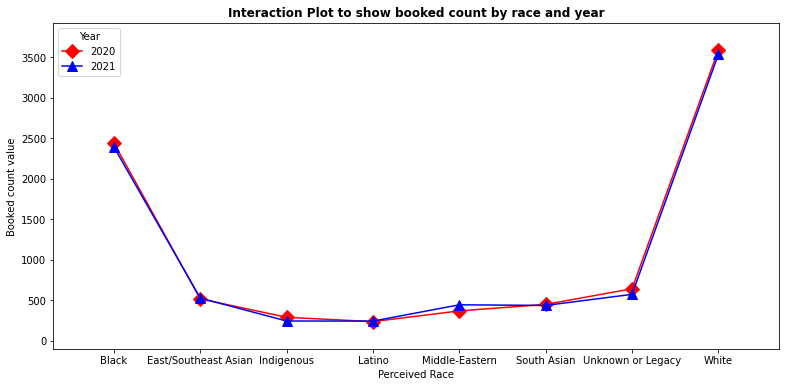

In [ ]:
year = data_frame['Year'].astype("category")
booked_count_value = data_frame['booked_count'].values

fig, ax = plt.subplots(figsize=(13, 6))

# x axis (Perceived Race), trace (year), dependent variable (Cooperative mean value)
fig = interaction_plot(data_frame['Perceived_Race'], year, booked_count_value, colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Booked count value')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show booked count by race and year', fontweight='bold')
plt.show()

Performing t-test for RQ2

**RQ2**: Hypothesis for t-test

**H0**: The population mean of the two independent groups, mean co-operation level while being arrested in the year 2020 and mean co-operation level while being arrested in the year 2021, are same.

**H1**: The population mean of the two independent groups, mean co-operation level while being arrested in the year 2020 and mean co-operation level while being arrested in the year 2021, are different.

In [ ]:
coop_2020 = data_frame_coop[data_frame_coop['Year'] == 2020]
coop_2021 = data_frame_coop[data_frame_coop['Year'] == 2021]

coop_mean_2020 = coop_2020['coop_mean']
coop_mean_2021 = coop_2021['coop_mean']

print('Ttest results for co-operation mean during arrest for year 2020 and 2021:', stats.ttest_ind(coop_mean_2020, coop_mean_2021, equal_var=True))

Ttest results for co-operation mean during arrest for year 2020 and 2021: Ttest_indResult(statistic=1.7769334346252192, pvalue=0.08572122834040749)


In [ ]:
# checking the confidence interval
cm_coop = sms.CompareMeans(sms.DescrStatsW(coop_mean_2020), sms.DescrStatsW(coop_mean_2021))
print('Confidence interval for co-operation mean during arrest for year 2020 and 2021: ', cm_coop.tconfint_diff(usevar='unequal'))

Confidence interval for co-operation mean during arrest for year 2020 and 2021:  (-0.005918440262050448, 0.08445674555805814)


In [ ]:
# calculating DOF
print('DOF for co-operative mean during arrests for year 2020 and 2021: ', welch_dof(coop_mean_2020, coop_mean_2021))

DOF for co-operative mean during arrests for year 2020 and 2021:  29.1596034940959


Performing one-way ANOVA

**RQ2: Hypothesis for one-way ANOVA**

**H0**: The mean level of co-operation for people being arrested for any offense for all 8 race groups is equal

**H1**: At least one mean group is different from the others for any of the race combination for the mean co-operation level while being arrested for any offense.

In [ ]:
# one-way ANOVA
white_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "White"]["coop_mean"]
black_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "Black"]["coop_mean"]
east_southeast_asian_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "East/Southeast Asian"]["coop_mean"]
indigenous_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "Indigenous"]["coop_mean"]
latino_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "Latino"]["coop_mean"]
middle_eastern_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "Middle-Eastern"]["coop_mean"]
south_asian_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "South Asian"]["coop_mean"]
unknown_or_legacy_coop = data_frame_coop[data_frame_coop["Perceived_Race"] == "Unknown or Legacy"]["coop_mean"]

statistic_coop, pvalue_coop = f_oneway(white_coop, black_coop, east_southeast_asian_coop, indigenous_coop, latino_coop, middle_eastern_coop, south_asian_coop, unknown_or_legacy_coop)
print(f'One-way ANOVA: s = {statistic_coop}, p = {pvalue_coop}')

# one-way ANOVA with tukey hsd
tukey_coop = pairwise_tukeyhsd(endog=data_frame_coop['coop_mean'],
                          groups=data_frame_coop['Perceived_Race'],
                          alpha=0.05)
print("\n", tukey_coop)

One-way ANOVA: s = 4.424344985656637, p = 0.0027928803322829535

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian   0.1247 0.0245   0.011  0.2384   True
               Black           Indigenous  -0.0379    0.9 -0.1516  0.0758  False
               Black               Latino   0.0812  0.302 -0.0325  0.1949  False
               Black       Middle-Eastern   0.0415    0.9 -0.0722  0.1552  False
               Black          South Asian   0.0523 0.7616 -0.0613   0.166  False
               Black    Unknown or Legacy   0.0074    0.9 -0.1063  0.1211  False
               Black                White   0.0145    0.9 -0.0992  0.1282  False
East/Southeast Asian           Indigenous  -0.1626 0.0018 -0.2763 -0.0489   True
East/Southeast Asian               Latino  

Performing two-way ANOVA

From the results of t-test and one-way ANOVA above, we can observe interesting facts about the number of people being co-operative during arrest.

Expanding the scope of analysis to check if there was any race based bias between the two years on the co-operation level of people being arrested.

**Hypothesis 1:**

H0: There is no difference in group means for co-operation level of people being arrested for any offense based on race for both years

H1: There exists a difference in group means for co-operation level of people being arrested for any offense based on race for both years

**Hypothesis 2:**

H0: There is no difference in group means for co-operation level of people being arrested for both years based on race

H1: There exists a difference in group means for co-operation level of people being arrested for both years based on race

**Hypothesis 3:**

H0: The effect of race does not depend on the effect of year on the co-operation of people being arrested, i.e., there is no interaction effect between race and year on the co-operation level of people being arrested for any offense

H1: The effect of race does depends on the effect of year on the co-operation of people being arrested, i.e., there is interaction effect between race and year on the co-operation level of people being arrested for any offense

In [ ]:
# performing two-way ANOVA
model_coop = ols('coop_mean ~ C(Perceived_Race) + C(Year) + C(Perceived_Race):C(Year)', data=data_frame_coop).fit()
sm.stats.anova_lm(model_coop, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),0.072988,7.0,4.226957,0.008066
C(Year),0.012337,1.0,5.001134,0.039925
C(Perceived_Race):C(Year),0.004756,7.0,0.275447,0.954652
Residual,0.039468,16.0,NaN,NaN


Interaction plot to show cooperation mean during arrest by race and year

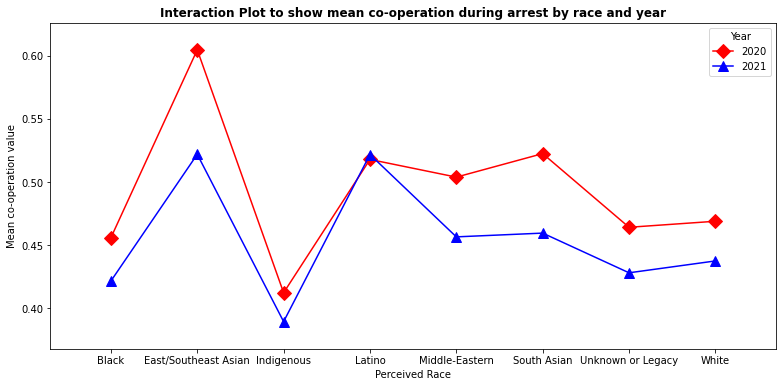

In [ ]:
year = data_frame_coop['Year'].astype("category")
cooperative_mean_value = data_frame_coop['coop_mean'].values

fig, ax = plt.subplots(figsize=(13, 6))

# x axis (Perceived Race), trace (year), dependent variable (Cooperative mean value)
fig = interaction_plot(data_frame_coop['Perceived_Race'], year, cooperative_mean_value, colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Mean co-operation value')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean co-operation during arrest by race and year', fontweight='bold')
plt.show()